In [1]:
from Bio import SeqIO

In [2]:
from Bio.SeqRecord import SeqRecord

In [3]:
from Bio.Seq import Seq

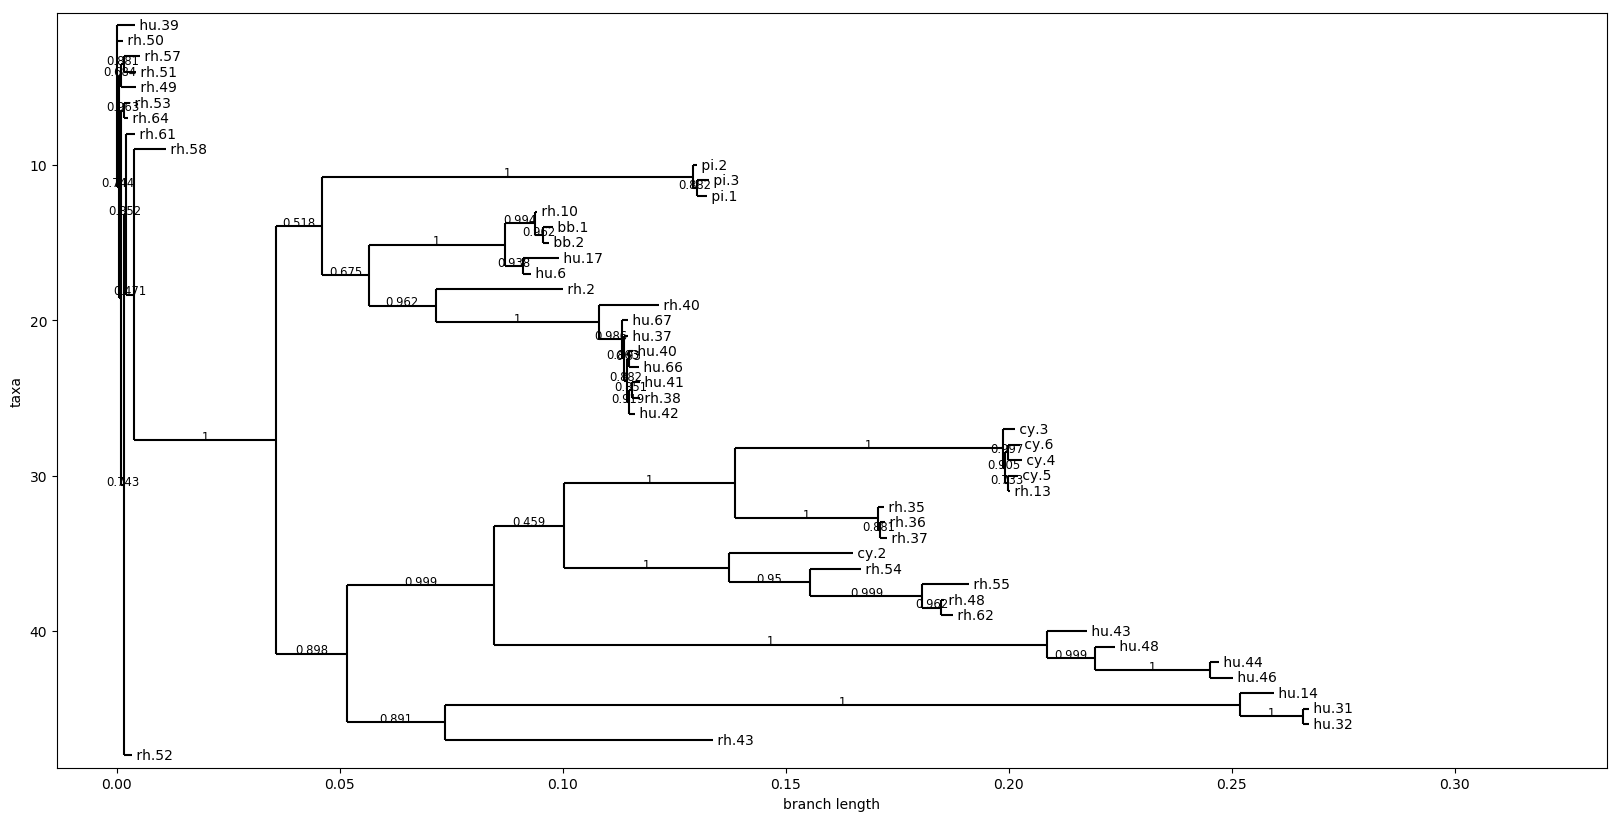

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from Bio import Phylo
from io import StringIO
tree = Phylo.read("tree.nwk","newick")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10), dpi=100)
axes = fig.add_subplot(1,1,1)
Phylo.draw(tree, axes=axes)


In [61]:
from Bio import SeqIO
list = ['rh.2','rh.49','rh.62']
for rec in SeqIO.parse('seqs.fa','fasta'):
     for name in list:
            if name == rec.name:
                print(">", rec.name, " ", rec.seq,"\n")

> rh.2   atggctgccgatggttatcttccagattggcttgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcacctcagcgttcccccgactcctccacgggcatcggcaagaaaggccaccagcccgcgagaaagagactgaactttgggcagactggcgactcggagtcagtccccgaccctcaaccaatcggagaaccaccagcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctgcccacctacaacaaccatctctacaagcaaatctccaacgggacatcgggaggaagcactaacgacaacacctactttggctacagcaccccctgggggtattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaataactggggattccggcccaagagactcaacttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaag

# 3 Clusters


## rh.2 from cluster 2(near the center of the tree)
rh.2 has been identified by BLAST as the Non-human primate Adeno-associated virus isolate AAVrh.2 capsid protein (VP1) gene. It differs from the hu.37 gene sequence by only 6%, which makes sense as this gene diverged from the rest the earliest.


## rh.49 from cluster 1(near the top)
rh.66 has been identified as the Adeno-associated virus isolate rh.49 capsid protein VP1 (cap) gene. Its sequence 
matches all the other protein's gene sequence by 99% in the same clade such as rh.53, rh.54 and rh.61, as they all 
share an immediate ancestral gene. 

## rh.62 from cluster 3(near the bottom)
rh.62 has been identified as the Adeno-associated virus isolate rh.62 capsid protein VP1 (cap) gene. Its sequence matches most closely to rh.48(99%) as they share an immediate ancetral gene. Its sequence matches rh.55(98%) more closely than rh.54(96%) because rh.54 diverged out earlier from this clade than rh.55.


Text(0,0.5,'%AT or %GC')

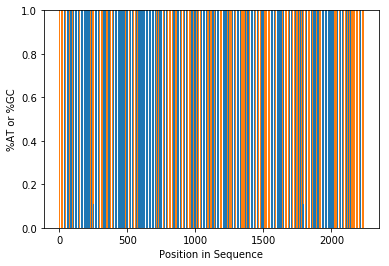

In [93]:
#cluster1
cluster1 = ["hu.39","rh.50","rh.57","rh.51","rh.49","rh.53","rh.64","rh.61","rh.58"]
seqClust1 = []
for rec in SeqIO.parse("seqs.aligned.fa","fasta"):
    if rec.name in cluster1:
        seqClust1.append(rec.seq)
GCList = [0 for i in seqClust1[0]]
totalList = [0 for i in seqClust1[0]]
for rec in seqClust1:
    for i in range(len(seqClust1[0])):
        if rec[i] != '-':
            totalList[i] += 1;
            if rec[i] == 'G' or rec[i] == 'C':
                GCList[i] += 1;
# reList = [0 if y == 0 else x/y for x,y in zip(GCList, totalList)]
reList = []
for i in range(len(GCList)):
    if totalList[i] == 0:
        reList.append(0)
    else:
        reList.append(GCList[i] / totalList[i])
#print(reList)
    
#cluster 1 stacked bar plot    
plt.bar((range(len(reList))), reList)
plt.bar((range(len(reList))), [1-x for x in reList], bottom=reList)
plt.xlabel('Position in Sequence') 
plt.ylabel('%AT or %GC')




{'whiskers': [<matplotlib.lines.Line2D at 0x13d547e48>,
 'caps': [<matplotlib.lines.Line2D at 0x13d556828>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d547550>],
 'medians': [<matplotlib.lines.Line2D at 0x13d436b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d436588>],
 'means': []}

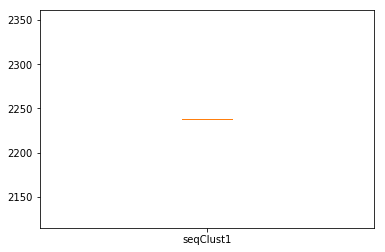

In [94]:
#cluster 1 box and whisker plot
cluster1 = ["hu.39","rh.50","rh.57","rh.51","rh.49","rh.53","rh.64","rh.61","rh.58"]
seqClust1 = []
for rec in SeqIO.parse("seqs.fa","fasta"):
    if rec.name in cluster1:
        seqClust1.append(rec.seq)

plt.boxplot([len(x) for x in seqClust1], labels=['seqClust1'])

Text(0,0.5,'%AT or %GC')

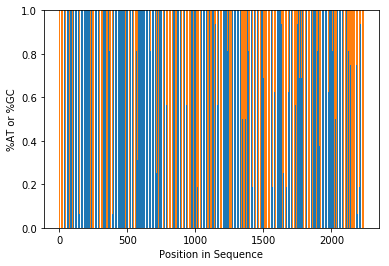

In [95]:
#cluster 2 stacked bar plot
cluster2 = ["pi.1","pi.2","pi.3",
            "rh.10","bb.1","bb.2","hu.17","hu.6","rh.2","rh.40","hu.67","hu.37","hu.40","hu.66","hu.41","hu.38","hu.42"]
seqClust2 = []
for rec in SeqIO.parse("seqs.aligned.fa","fasta"):
    if rec.name in cluster2:
        seqClust2.append(rec.seq)
GCList2 = [0 for i in seqClust2[0]]
totalList2 = [0 for i in seqClust2[0]]
for rec in seqClust2:
    for i in range(len(seqClust2[0])):
        if rec[i] != '-':
            totalList2[i] += 1;
            if rec[i] == 'G' or rec[i] == 'C':
                GCList2[i] += 1;
                
reList2 = []
for i in range(len(GCList2)):
    if totalList2[i] == 0:
        reList2.append(0)
    else:
        reList2.append(GCList2[i] / totalList2[i])
#print(reList2)

#cluster 2 stacked bar plot    
plt.bar((range(len(reList2))), reList2)
plt.bar((range(len(reList2))), [1-x for x in reList2], bottom=reList2)
plt.xlabel('Position in Sequence') 
plt.ylabel('%AT or %GC')


{'whiskers': [<matplotlib.lines.Line2D at 0x10c89e630>,
 'caps': [<matplotlib.lines.Line2D at 0x1142dd470>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c8870f0>],
 'medians': [<matplotlib.lines.Line2D at 0x10cf63b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x10cf79b70>],
 'means': []}

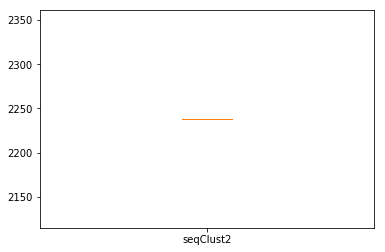

In [96]:
#cluster 2 box and whisker plot
cluster2 = ["pi.1","pi.2","pi.3",
            "rh.10","bb.1","bb.2","hu.17","hu.6","rh.2","rh.40","hu.67","hu.37","hu.40","hu.66","hu.41","hu.38","hu.42"]
seqClust2 = []
for rec in SeqIO.parse("seqs.fa","fasta"):
    if rec.name in cluster2:
        seqClust2.append(rec.seq)

plt.boxplot([len(x) for x in seqClust2], labels=['seqClust2'])

Text(0,0.5,'%AT or %GC')

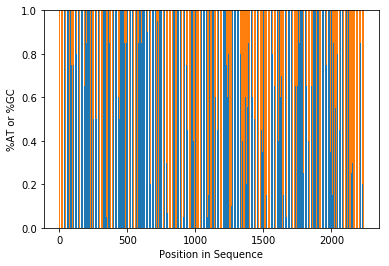

In [97]:
# cluster 3
cluster3 = ["cy.3","cy.6","cy.4","cy.5","rh.13","rh.35","rh.36","rh.37","cy.2","rh.54","rh.55","rh.48","rh.62","hu.43",
            "hu.48","hu.44","hu.46","hu.14","hu.31","hu.32"]
seqClust3 = []
for rec in SeqIO.parse("seqs.aligned.fa","fasta"):
    if rec.name in cluster3:
        seqClust3.append(rec.seq)
GCList3 = [0 for i in seqClust3[0]]
totalList3 = [0 for i in seqClust3[0]]
for rec in seqClust3:
    for i in range(len(seqClust3[0])):
        if rec[i] != '-':
            totalList3[i] += 1;
            if rec[i] == 'G' or rec[i] == 'C':
                GCList3[i] += 1;
                
reList3 = []
for i in range(len(GCList3)):
    if totalList3[i] == 0:
        reList3.append(0)
    else:
        reList3.append(GCList3[i] / totalList3[i])
#print(reList3)

#cluster 3 stacked bar plot    
plt.bar((range(len(reList3))), reList3)
plt.bar((range(len(reList3))), [1-x for x in reList3], bottom=reList3)
plt.xlabel('Position in Sequence') 
plt.ylabel('%AT or %GC')


{'whiskers': [<matplotlib.lines.Line2D at 0x1424e2d68>,
 'caps': [<matplotlib.lines.Line2D at 0x14253fba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1424d9828>],
 'medians': [<matplotlib.lines.Line2D at 0x14259a2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1425c3668>],
 'means': []}

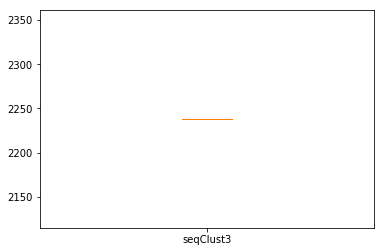

In [98]:
#cluster 3 box and whisker plot
cluster3 = ["cy.3","cy.6","cy.4","cy.5","rh.13","rh.35","rh.36","rh.37","cy.2","rh.54","rh.55","rh.48","rh.62","hu.43",
            "hu.48","hu.44","hu.46","hu.14","hu.31","hu.32"]
seqClust3 = []
for rec in SeqIO.parse("seqs.fa","fasta"):
    if rec.name in cluster3:
        seqClust3.append(rec.seq)
        
plt.boxplot([len(x) for x in seqClust3], labels=['seqClust3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x143f38e10>,
 'caps': [<matplotlib.lines.Line2D at 0x143f94c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x143f2d8d0>,
 'medians': [<matplotlib.lines.Line2D at 0x143fee390>,
 'fliers': [<matplotlib.lines.Line2D at 0x144018710>,
 'means': []}

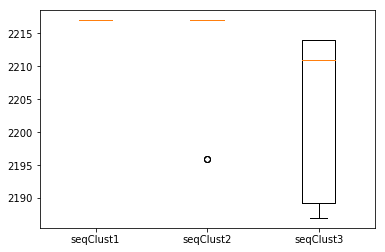

In [101]:
cluster1 = ["hu.39","rh.50","rh.57","rh.51","rh.49","rh.53","rh.64","rh.61","rh.58"]
seqClust1 = []
for rec in SeqIO.parse("seqs.fa","fasta"):
    if rec.name in cluster1:
        seqClust1.append(rec.seq)
        
cluster2 = ["pi.1","pi.2","pi.3",
            "rh.10","bb.1","bb.2","hu.17","hu.6","rh.2","rh.40","hu.67","hu.37","hu.40","hu.66","hu.41","hu.38","hu.42"]
seqClust2 = []
for rec in SeqIO.parse("seqs.fa","fasta"):
    if rec.name in cluster2:
        seqClust2.append(rec.seq)
        
cluster3 = ["cy.3","cy.6","cy.4","cy.5","rh.13","rh.35","rh.36","rh.37","cy.2","rh.54","rh.55","rh.48","rh.62","hu.43",
            "hu.48","hu.44","hu.46","hu.14","hu.31","hu.32"]
seqClust3 = []
for rec in SeqIO.parse("seqs.fa","fasta"):
    if rec.name in cluster3:
        seqClust3.append(rec.seq)        

data=[[len(x) for x in seqClust1],[len(x) for x in seqClust2],[len(x) for x in seqClust3]]
plt.boxplot(data, labels=['seqClust1', 'seqClust2', 'seqClust3'])